In [9]:
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


In [139]:
def set_box_color(bp, color):
    """Set colour for boxplot."""
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


def create_boxplots(arr1, arr2, arr3, labels, m, n,
                    lambda_max, title, ticks):
    """Generate boxplots for data."""
    plt.figure(figsize=(8, 5))
    if title == 'func_vals':
        plt.yscale("log")
        plt.ylim(0.01, np.max(arr1) + 1000)
    bpl = plt.boxplot(arr1.T,
                      positions=np.array(range(len(arr1)))*3.0-0.7)
    bpc = plt.boxplot(arr2.T,
                      positions=np.array(range(len(arr2)))*3.0+0)
    bpr = plt.boxplot(arr3.T,
                      positions=np.array(range(len(arr3)))*3.0+0.7)
    set_box_color(bpl, 'green')
    set_box_color(bpc, 'purple')
    set_box_color(bpr, 'navy')
    plt.plot([], c='green', label=labels[0])
    plt.plot([], c='purple', label=labels[1])
    plt.plot([], c='navy', label=labels[2])
    plt.legend(bbox_to_anchor=(0.99, 1.025), loc='upper left',
               prop={'size': 12})
    plt.xlabel(r'$\sigma$', size=15)
    plt.xticks(np.arange(0, len(ticks) * 3, 3), ticks, size=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
#     plt.savefig('%s_m_%s_n_%s_lambda_max_%s_diff_noise.pdf' %
#                  (title, m, n, lambda_max))

                 
def create_boxplots_funv_evals(arr1, arr2, m, n, lambda_max, option,
                               ticks, max_func_evals):
    plt.figure(figsize=(8, 5))
    bpl = plt.boxplot(arr1.T,
                      positions=np.array(range(len(arr1)))*2.0-0.4)
    bpr = plt.boxplot(arr2.T,
                      positions=np.array(range(len(arr2)))*2.0+0.4)
    set_box_color(bpl, '#D7191C')
    set_box_color(bpr, '#2C7BB6')
    plt.plot([], c='#D7191C', label=r'$\gamma_k$')
    plt.plot([], c='#2C7BB6', label=r'$s_k$')
    plt.legend(bbox_to_anchor=(0.99, 1.025), loc='upper left',
               prop={'size': 15})
    plt.xlabel(r'$\sigma$', size=15)
    plt.xticks(range(0, len(ticks) * 2, 2), ticks, size=15)
    plt.yticks(fontsize=15)
    plt.ylim(0, max_func_evals)
    plt.tight_layout()
#     plt.savefig('func_evals_m_%s_n_%s_lambda_max_%s_diff_noise_%s.pdf' %
#                 (m, n, lambda_max, option))


def create_boxplots_ratio(arr1, arr2, labels, m, n,
                          max_func_evals_t, lambda_max,
                          title, ticks):
    plt.figure(figsize=(8, 5))
    plt.ylim(-0.01,1)
    bpl = plt.boxplot(arr1.T,
                      positions=np.array(range(len(arr1)))*2.0-0.4)
    bpr = plt.boxplot(arr2.T,
                      positions=np.array(range(len(arr2)))*2.0+0.4)
    set_box_color(bpl, 'green')
    set_box_color(bpr, 'navy')
    plt.plot([], c='green', label=labels[0])
    plt.plot([], c='navy', label=labels[1])
    plt.legend(bbox_to_anchor=(0.99, 1.025), loc='upper left',
               prop={'size': 17})
    plt.xlabel(r'$\sigma$', size=15)
    plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks, size=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
#     plt.savefig('%s_ratio_m_%s_n_%s_lambda_max_%s_diff_noise.pdf' %
#                (title, m, n, lambda_max))


def create_scatter_plot(arr1, arr2, arr1_title, arr2_title, labels_legend,
                        title, m, n, max_func_evals_t, lambda_max):
    plt.figure(figsize=(8, 5))
    max_num = max(np.max(arr1), np.max(arr2)) + 1
    plt.xlim(-0.01, max_num)
    plt.ylim(-0.01, max_num)
    plt.xlabel(arr1_title, size=15)
    plt.ylabel(arr2_title, size=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    color_list = ['red', 'blue', 'purple', 'green']
    for j in range(arr1.shape[0]):
        plt.scatter(arr1[j], arr2[j], marker='*', color=color_list[j])
        plt.plot([], c=color_list[j], label=labels_legend[j])
    plt.legend(bbox_to_anchor=(0.99, 1.025), loc='upper left',
               prop={'size': 15})
    
    arr1_reshape = arr1.reshape(arr1.shape[0]* arr1.shape[1])
    arr2_reshape = arr2.reshape(arr2.shape[0]* arr2.shape[1])
    polyfit_arr1_arr2 = np.polyfit(arr1_reshape, arr2_reshape, 1)
    print(polyfit_arr1_arr2[0], polyfit_arr1_arr2[1])
    extended = np.linspace(0, max_num, 1000)
    plt.plot(extended, np.polyval(polyfit_arr1_arr2,extended),  color='black')
    plt.tight_layout() 
#     plt.savefig('%s_scatter_m_%s_n_%s_lambda_max_%s_diff_noise.pdf' %
#                 (title, m, n, lambda_max))


In [140]:
n = 16
m = 200
lambda_max = 1
domain = (0, 5)
num_funcs = 100

In [141]:
if lambda_max == 1:
    noise_list = [1, 5, 10, 20]
    # max_func_evals_list = [2000, 4000, 4000, 8000, 8000] d=100
    max_func_evals_list = [10000, 12000, 15000, 20000]
elif lambda_max == 8:
    noise_list = [10, 20, 50, 100]
    # max_func_evals_list = [8000, 8000, 10000, 10000, 10000] d=100
    max_func_evals_list = [20000, 30000, 40000, 50000]
elif lambda_max == 16:
    noise_list = [10, 50, 100, 200]
    # max_func_evals_list = [8000, 8000, 10000, 10000, 10000] d=100
    max_func_evals_list = [30000, 50000, 80000, 100000]
elif lambda_max == 64:
    noise_list = [100, 200, 400, 800]
    # max_func_evals_list = [15000, 15000, 15000, 15000, 15000] d=100
    max_func_evals_list = [50000, 80000, 100000, 140000]

In [142]:

fp_norms_LS = np.genfromtxt('fp_norms_LS_n=%s_m=%s_lambda_max=%s.csv' %
                            (n, m, lambda_max),
                             delimiter=',')

fp_func_vals_LS = np.genfromtxt('fp_func_vals_LS_n=%s_m=%s_lambda_max=%s.csv' %
                            (n, m, lambda_max),
                             delimiter=',')

func_evals_step_LS = np.genfromtxt('func_evals_step_LS_n=%s_m=%s_lambda_max=%s.csv' %
                                (n, m, lambda_max),
                                 delimiter=',')

func_evals_dir_LS = np.genfromtxt('func_evals_dir_LS_n=%s_m=%s_lambda_max=%s.csv' %
                                (n, m, lambda_max),
                                 delimiter=',')

fp_norms_XY = np.genfromtxt('fp_norms_XY_n=%s_m=%s_lambda_max=%s.csv' %
                            (n, m, lambda_max),
                             delimiter=',')

fp_func_vals_XY = np.genfromtxt('fp_func_vals_XY_n=%s_m=%s_lambda_max=%s.csv' %
                            (n, m, lambda_max),
                             delimiter=',')

func_evals_step_XY = np.genfromtxt('func_evals_step_XY_n=%s_m=%s_lambda_max=%s.csv' %
                                (n, m, lambda_max),
                                 delimiter=',')

func_evals_dir_XY = np.genfromtxt('func_evals_dir_XY_n=%s_m=%s_lambda_max=%s.csv' %
                                    (n, m, lambda_max),
                                    delimiter=',')

sp_norms = np.genfromtxt('sp_norms_n=%s_m=%s_lambda_max=%s.csv' %
                         (n, m, lambda_max), delimiter=',')

sp_func_vals = np.genfromtxt('sp_func_vals_n=%s_m=%s_lambda_max=%s.csv' %
                             (n, m, lambda_max), delimiter=',')

var_quad_noise = np.genfromtxt('var_quad_noise_n=%s_m=%s_lambda_max=%s.csv' %
                             (n, m, lambda_max), delimiter=',')



In [143]:
#Generate boxplots
labels = [[r'$||x_1 - x_{*}||$',
            r'$||x_{K}^{(LS)} - x_{*}||$',
            r'$||x_{K}^{(MY)} - x_{*}||$'],
            [r'$f(x_1)$',
            r'$f(x_{K}^{(LS)})$',
            r'$f(x_{K}^{(MY)})$'],
            [r'$\frac{||x_{K}^{(LS)} - x_{*}||}{||x_1 - x_{*}||}$',
            r'$\frac{||x_{K}^{(MY)} - x_{*}||}{||x_1 - x_{*}||}$'],
            [r'$\frac{f(x_{K}^{(LS)})}{f(x_1)}$',
            r'$\frac{f(x_{K}^{(MY)})}{f(x_1)}$']]

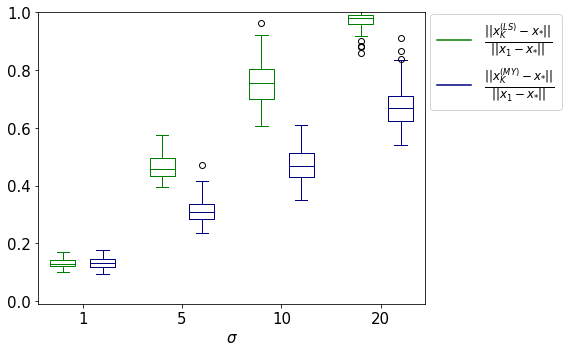

In [144]:
create_boxplots_ratio(fp_norms_LS/sp_norms, fp_norms_XY/sp_norms, labels[2],
                       m, n, max(max_func_evals_list),
                       lambda_max, 'norms', noise_list)



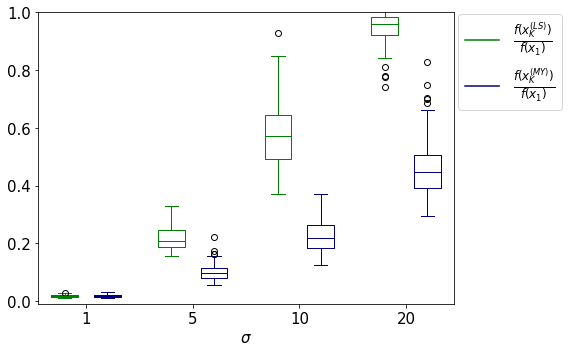

In [145]:
create_boxplots_ratio(fp_func_vals_LS/sp_func_vals, fp_func_vals_XY/sp_func_vals,
                      labels[3], m, n,
                      max(max_func_evals_list), lambda_max, 'func_vals',
                      noise_list)

In [146]:
labels_legend = []
for j in range(len(noise_list)):
    labels_legend.append(r'$\sigma = %s$' % noise_list[j])


0.6143654804061911 1.1766917129767216


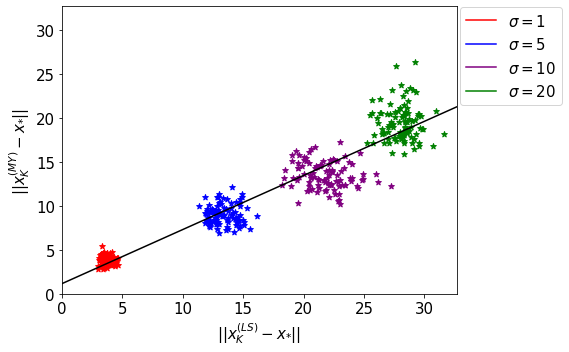

In [147]:
create_scatter_plot(fp_norms_LS, fp_norms_XY, labels[0][1], labels[0][2],
                    labels_legend, 'norms', m, n, max(max_func_evals_list),
                    lambda_max)



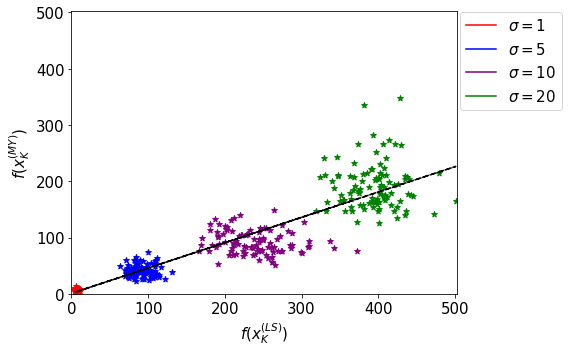

In [112]:
create_scatter_plot(fp_func_vals_LS, fp_func_vals_XY, labels[1][1],
                    labels[1][2], labels_legend, 'func_vals', m, n,
                    max(max_func_evals_list), lambda_max)

In [113]:
fp_func_vals_LS_reshape = fp_func_vals_LS.reshape(400,)
fp_func_vals_XY_reshape = fp_func_vals_XY.reshape(400,)

In [114]:
fp_norms_LS_reshape = fp_norms_LS.reshape(400,)
fp_norms_XY_reshape = fp_norms_XY.reshape(400,)

In [115]:
def check_reshape(arr1, arr1_reshape):
    index_1 = 0
    index_2 = 0
    for j in range(400):
        if (j > 0) and (j % 100 == 0):
            index_1 += 1
            index_2 = 0
        assert(arr1_reshape[j] == arr1[index_1][index_2])
        index_2 += 1

In [116]:
check_reshape(fp_func_vals_LS, fp_func_vals_LS_reshape)

In [117]:
check_reshape(fp_func_vals_XY, fp_func_vals_XY_reshape)

In [51]:
check_reshape(fp_norms_LS, fp_norms_LS_reshape)

In [52]:
check_reshape(fp_norms_XY, fp_norms_XY_reshape)

In [53]:
m, b = np.polyfit(fp_func_vals_LS_reshape, fp_func_vals_XY_reshape, 1)

In [54]:
m

0.4496760995808938

In [55]:
b

1.213353791815189